## Auto Visualization

In [37]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz(pca_df)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (4174, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
PCA1,float64,0.000000,NA,-6.843726,17.627443,Column has 147 outliers greater than upper bound (5.83) or lower than lower bound(-6.31). Cap them or remove them.
PCA2,float64,0.000000,NA,-10.342455,14.290539,Column has 113 outliers greater than upper bound (4.98) or lower than lower bound(-5.26). Cap them or remove them.
PCA3,float64,0.000000,NA,-5.424372,9.700762,Column has 128 outliers greater than upper bound (4.91) or lower than lower bound(-5.19). Cap them or remove them.
PCA4,float64,0.000000,NA,-6.147205,10.287780,Column has 55 outliers greater than upper bound (5.24) or lower than lower bound(-5.34). Cap them or remove them.


Number of All Scatter Plots = 10
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [43]:
print(df.columns)
print(df["aki_stage"].dtype)
print(df["aki_stage"].value_counts())

Index(['creat', 'aki_stage', 'ANIONGAP_min', 'ANIONGAP_max', 'BICARBONATE_min',
       'BICARBONATE_max', 'CREATININE_min', 'CREATININE_max', 'CHLORIDE_min',
       'CHLORIDE_max', 'GLUCOSE_min', 'GLUCOSE_max', 'HEMATOCRIT_min',
       'HEMATOCRIT_max', 'HEMOGLOBIN_min', 'HEMOGLOBIN_max', 'LACTATE_min',
       'LACTATE_max', 'PLATELET_min', 'PLATELET_max', 'POTASSIUM_min',
       'POTASSIUM_max', 'PTT_min', 'PTT_max', 'INR_min', 'INR_max', 'PT_min',
       'PT_max', 'SODIUM_min', 'SODIUM_max', 'BUN_min', 'BUN_max', 'WBC_min',
       'WBC_max', 'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean',
       'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max',
       'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
       'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean',
       'Glucose_Min_1', 'Glucose_Max_1', 'Glucose_Mean'],
      dtype='object')
int64
aki_stage
0    4687
1    3995
3 

Shape of your Data Set loaded: (4174, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
To fix these data quality 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
PCA1,float64,0.000000,NA,-6.843726,17.627443,Column has 147 outliers greater than upper bound (5.83) or lower than lower bound(-6.31). Cap them or remove them.
PCA2,float64,0.000000,NA,-10.342455,14.290539,Column has 113 outliers greater than upper bound (4.98) or lower than lower bound(-5.26). Cap them or remove them.
PCA3,float64,0.000000,NA,-5.424372,9.700762,Column has 128 outliers greater than upper bound (4.91) or lower than lower bound(-5.19). Cap them or remove them.
PCA4,float64,0.000000,NA,-6.147205,10.287780,Column has 55 outliers greater than upper bound (5.24) or lower than lower bound(-5.34). Cap them or remove them.
aki_stage,int64,0.000000,0,0.000000,3.000000,Target column


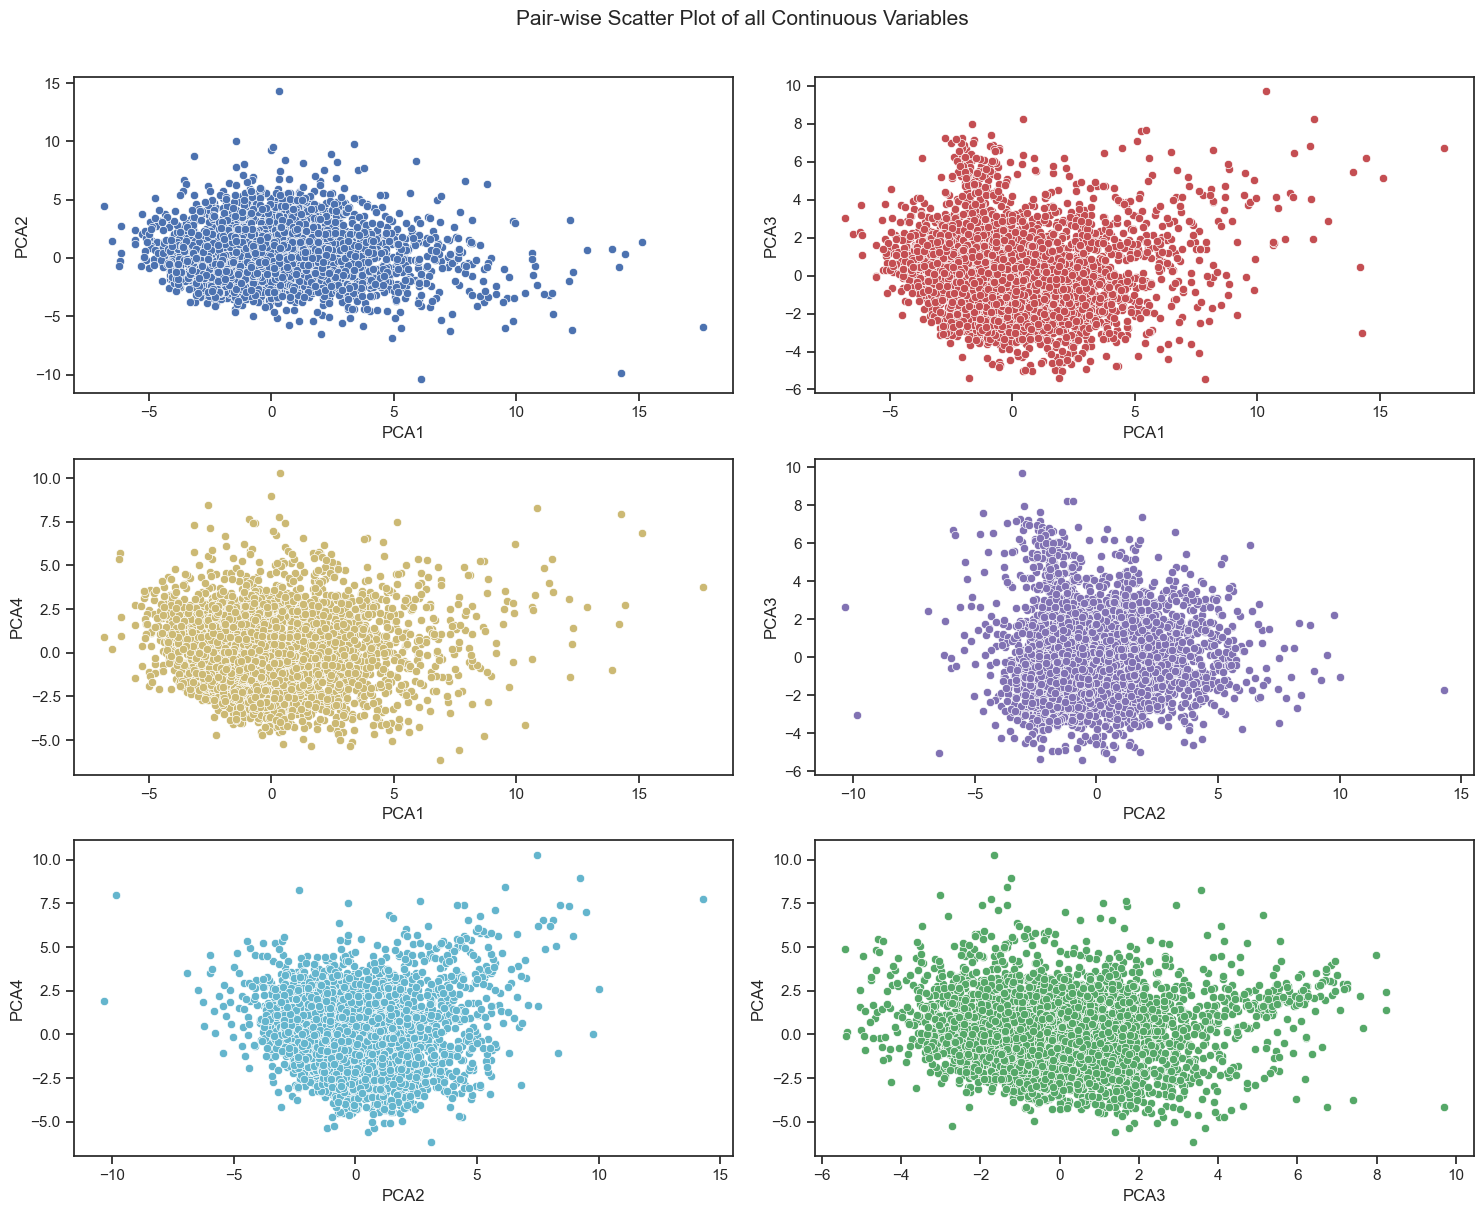

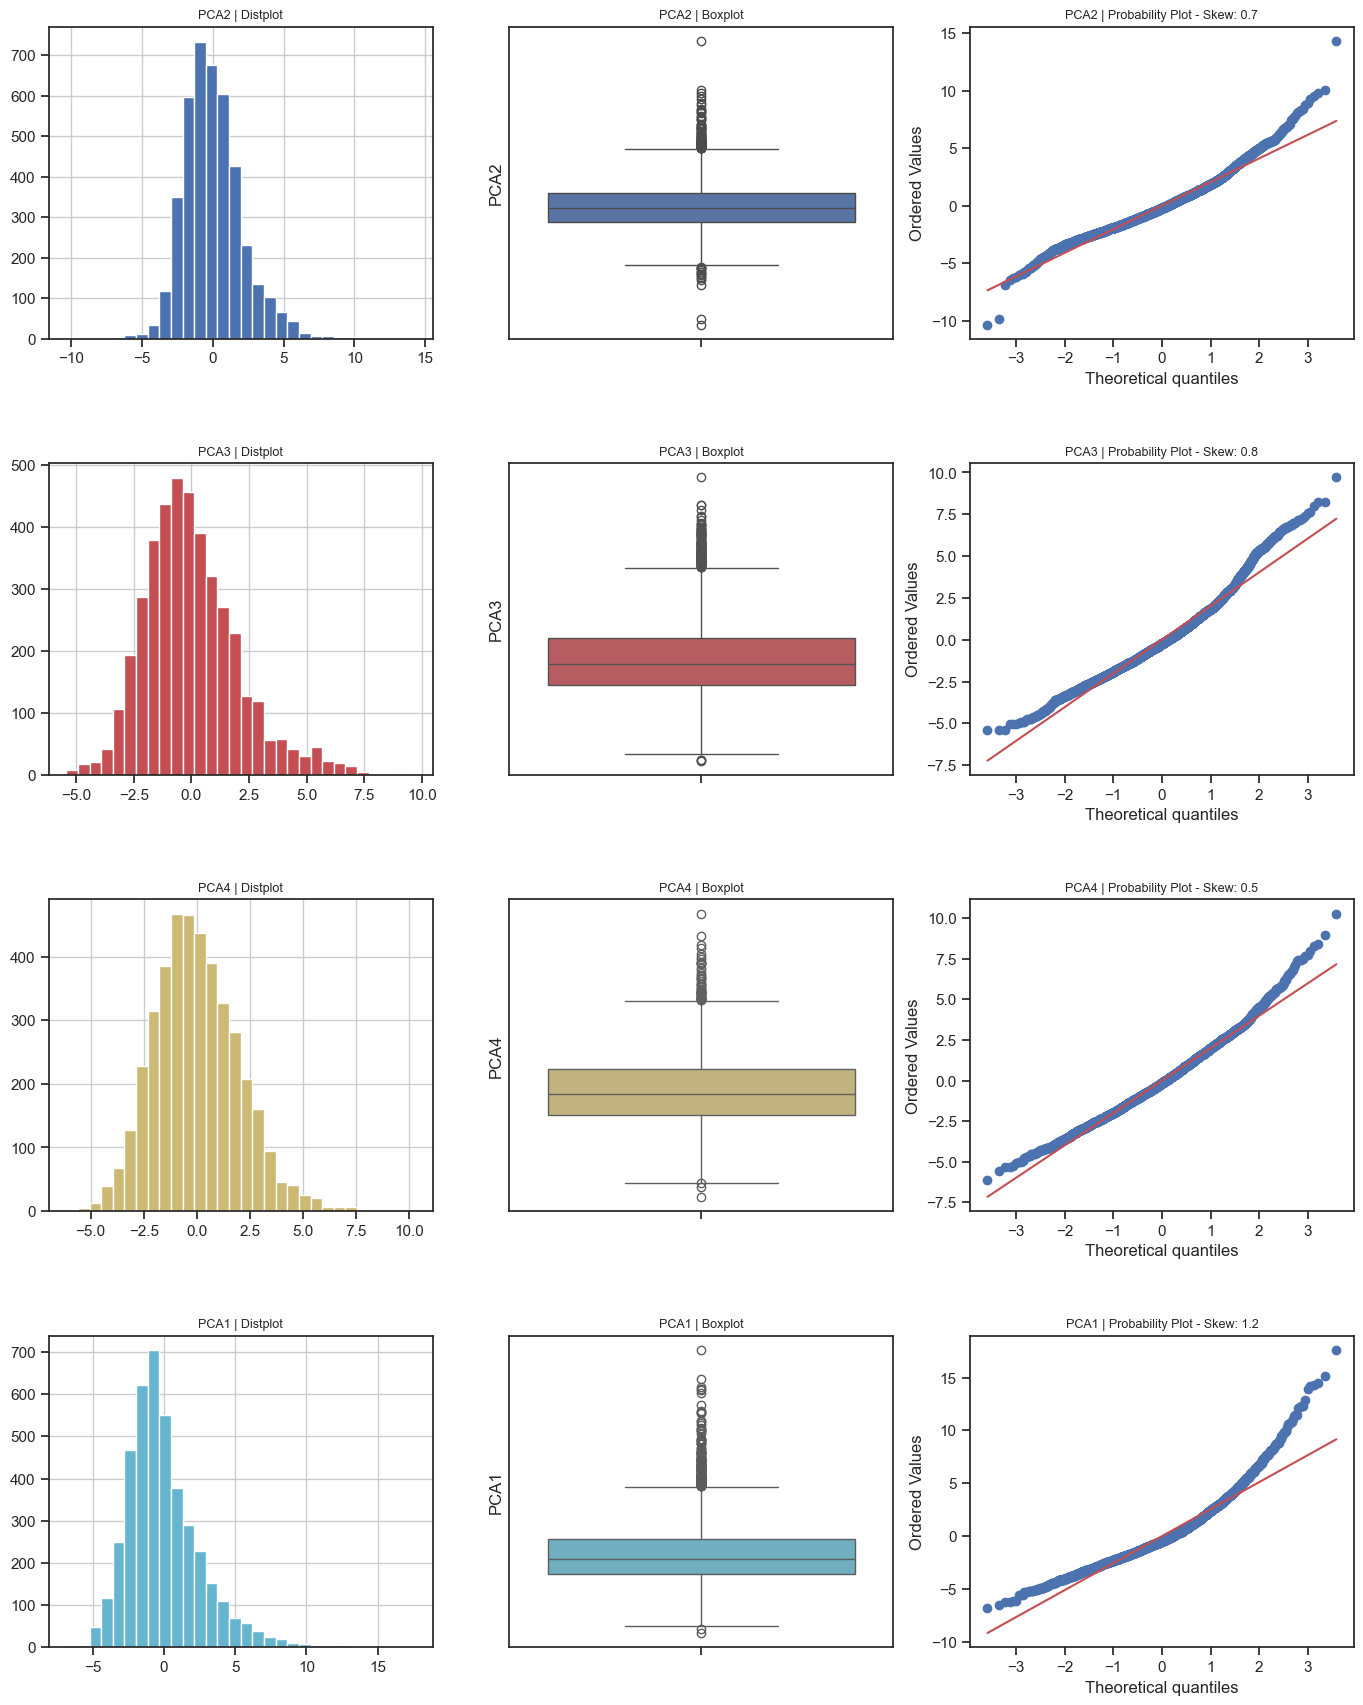

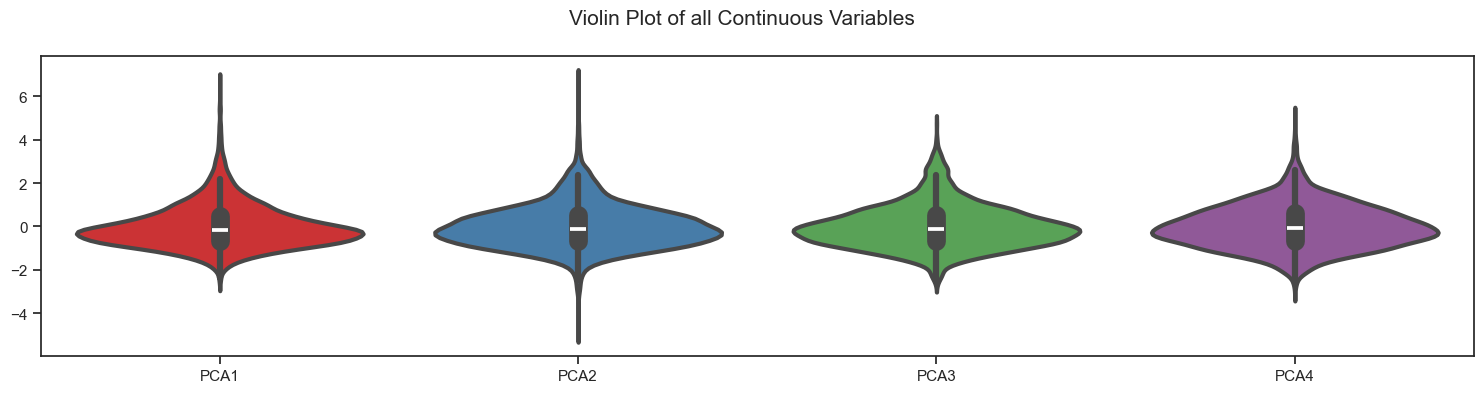

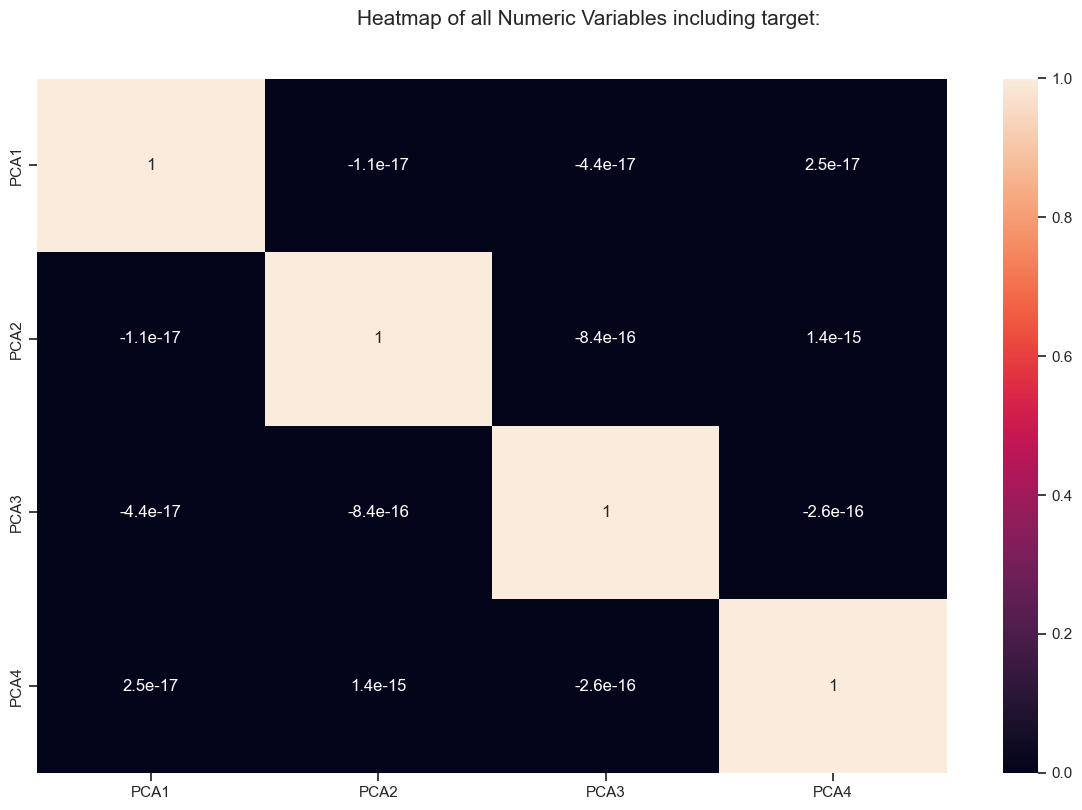

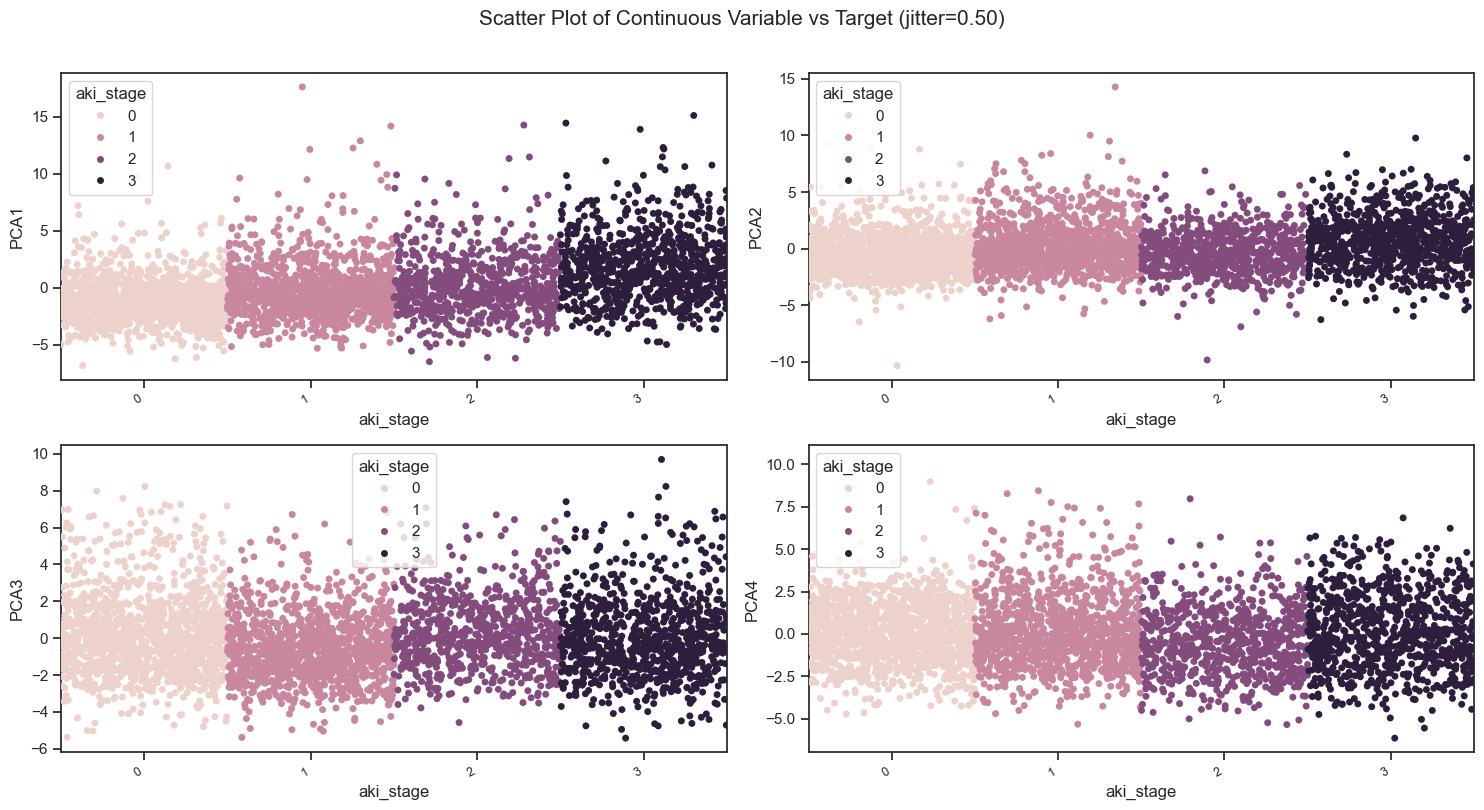

Total Number of Scatter Plots = 10


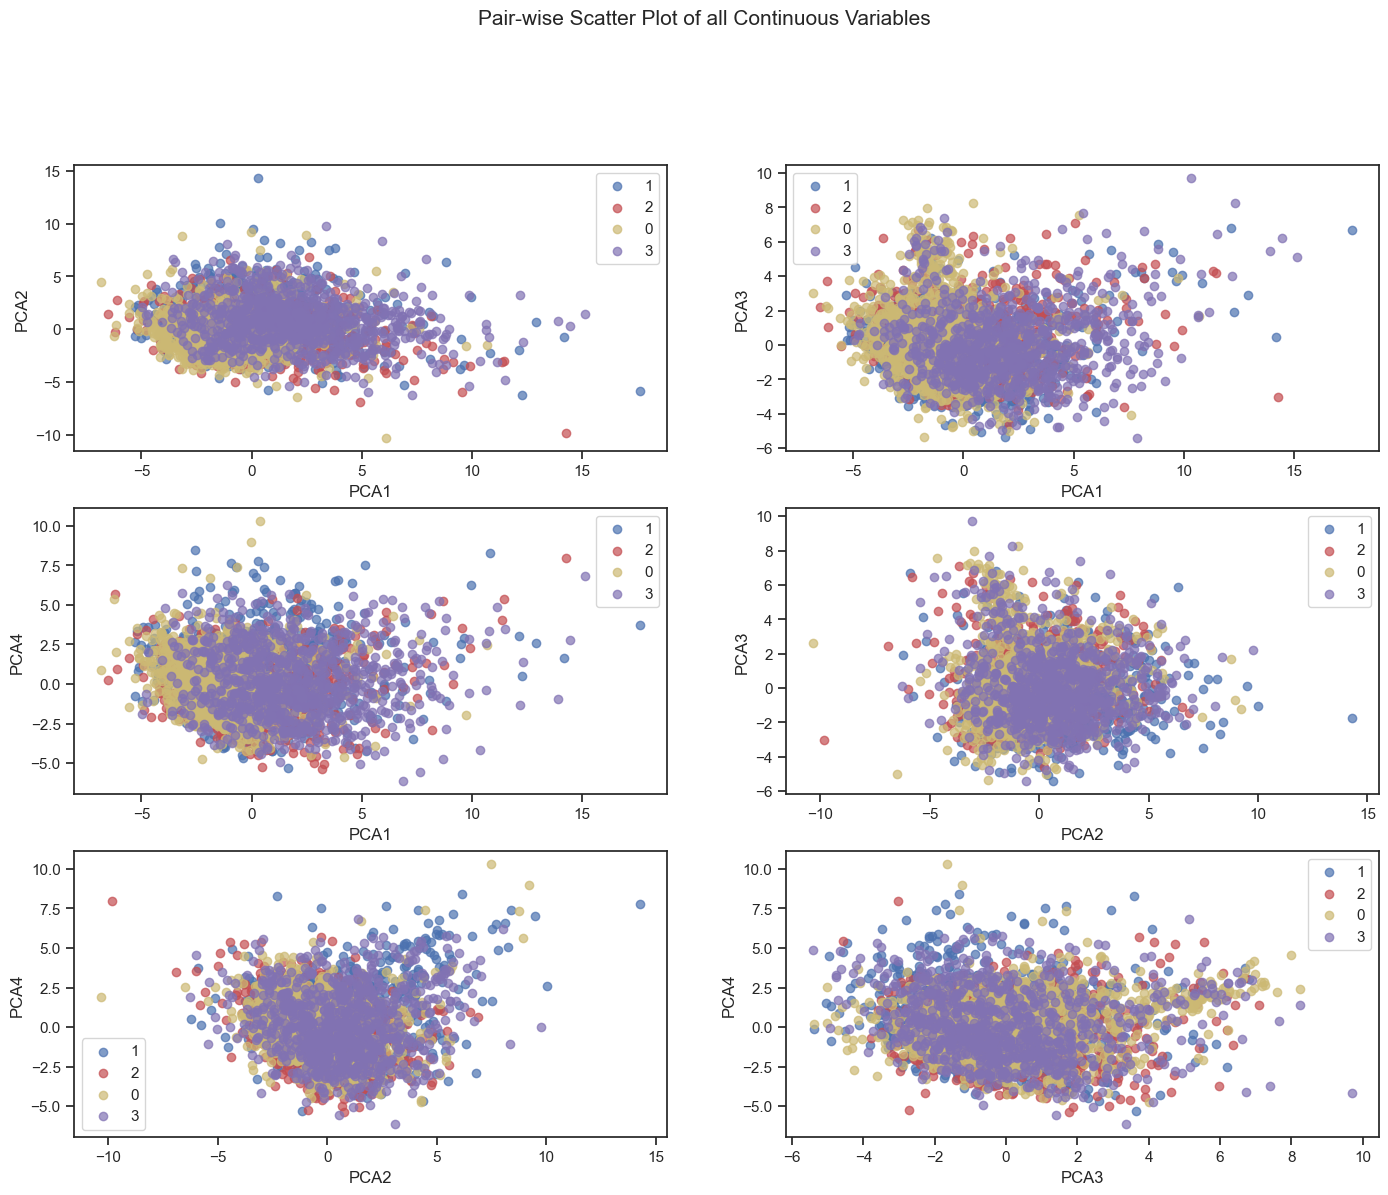

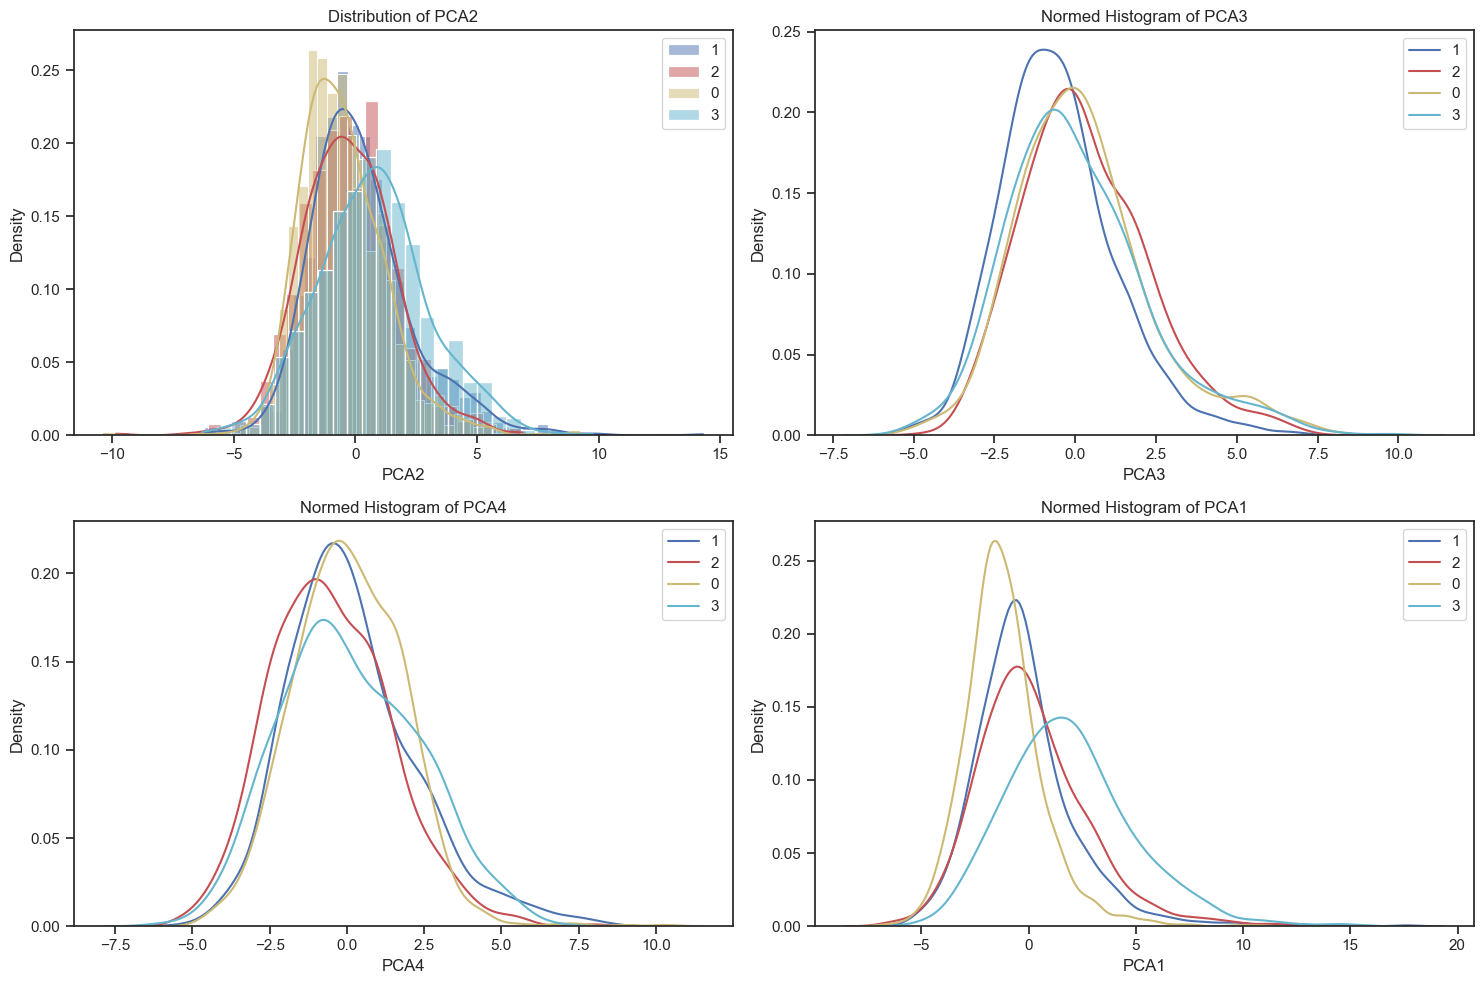

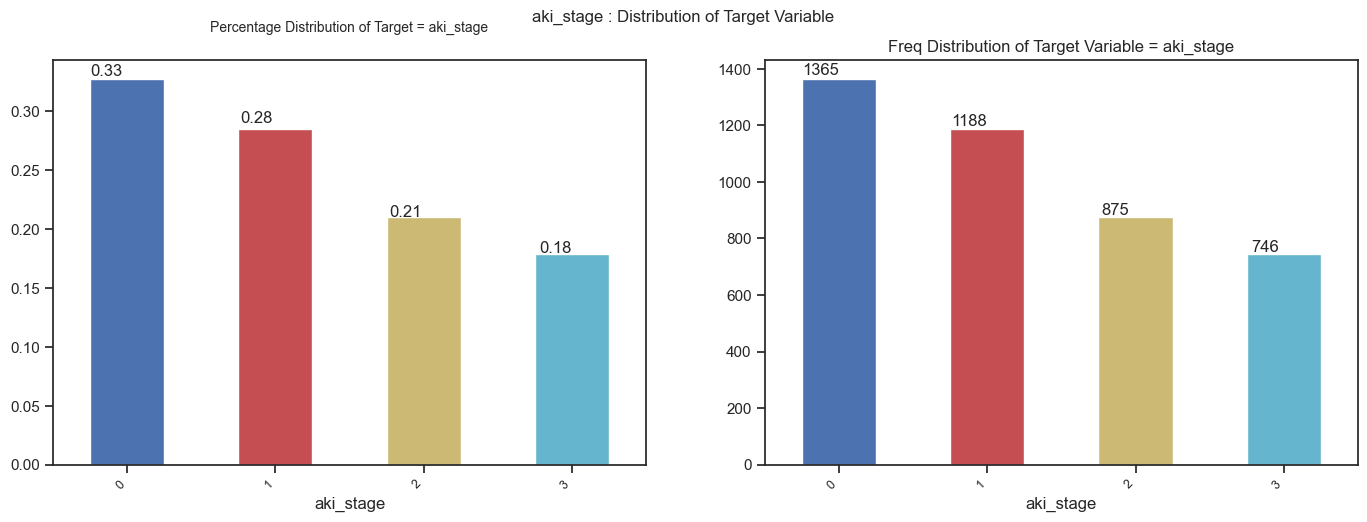

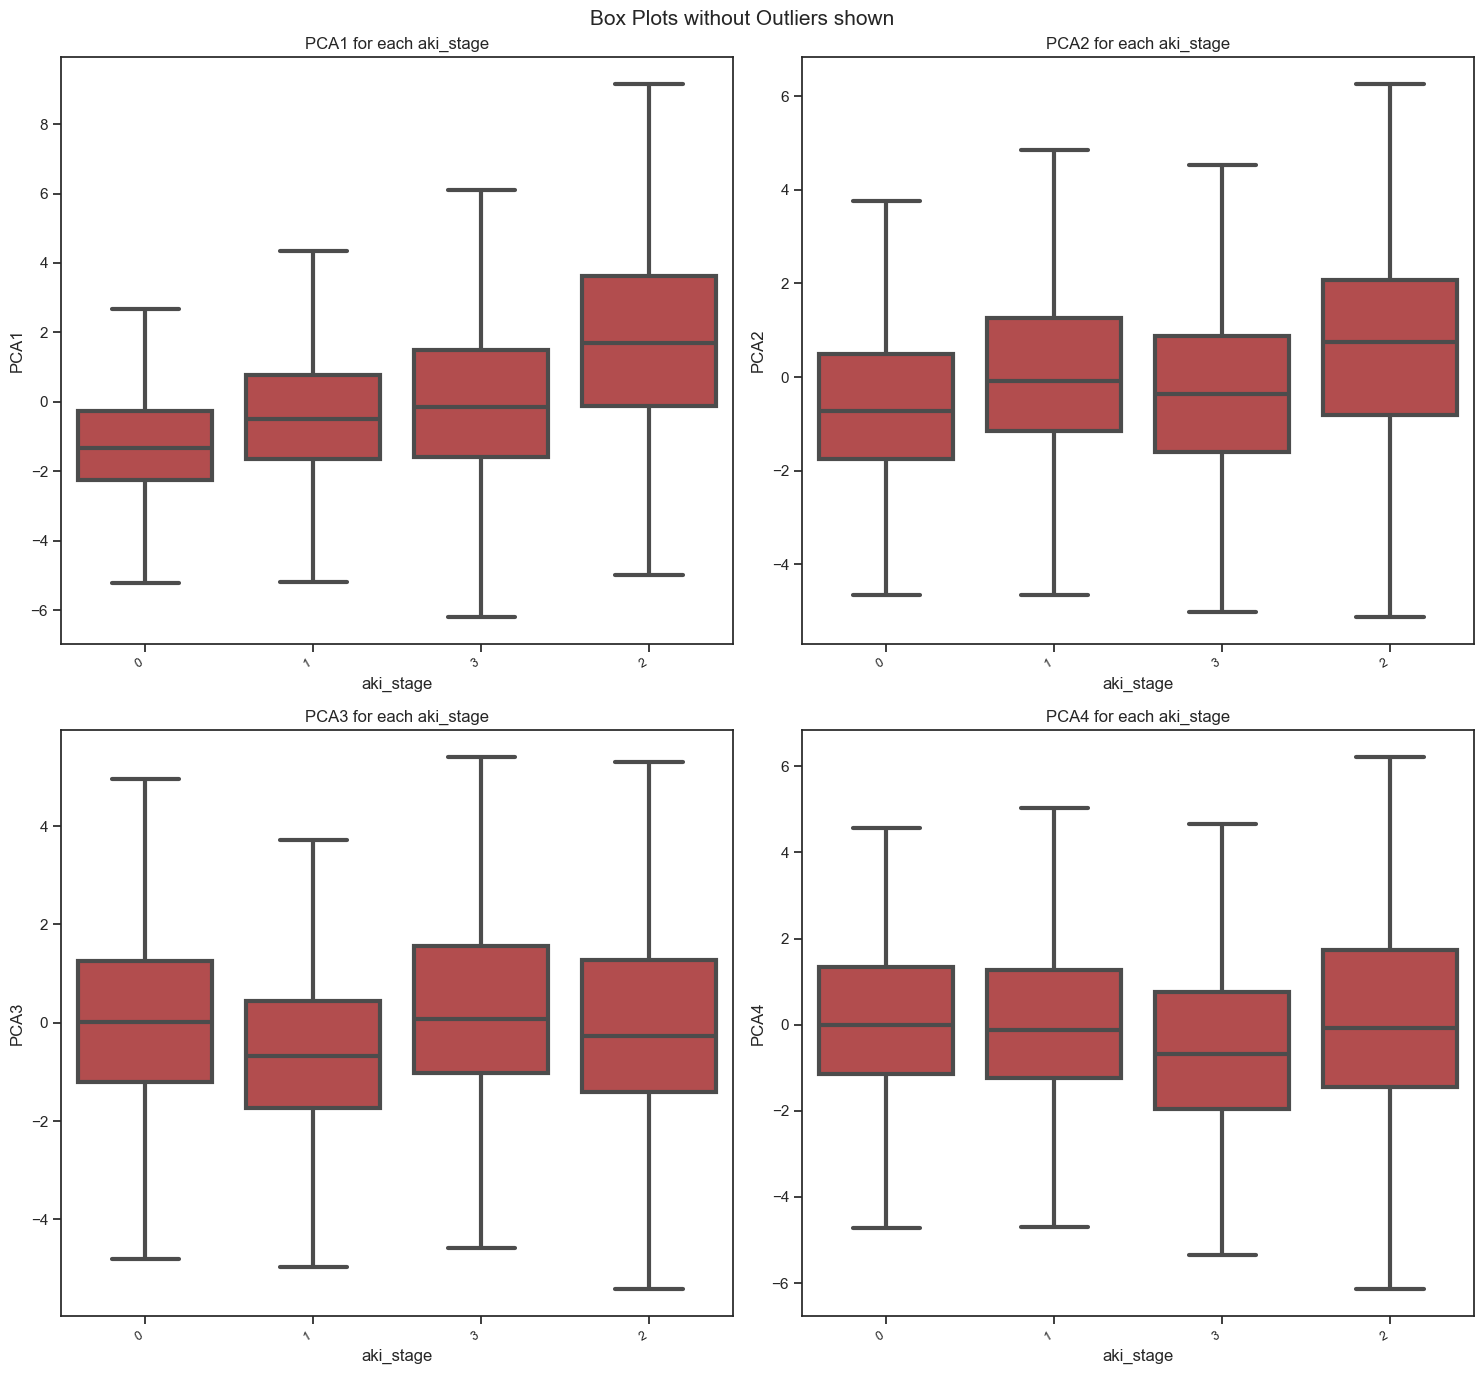

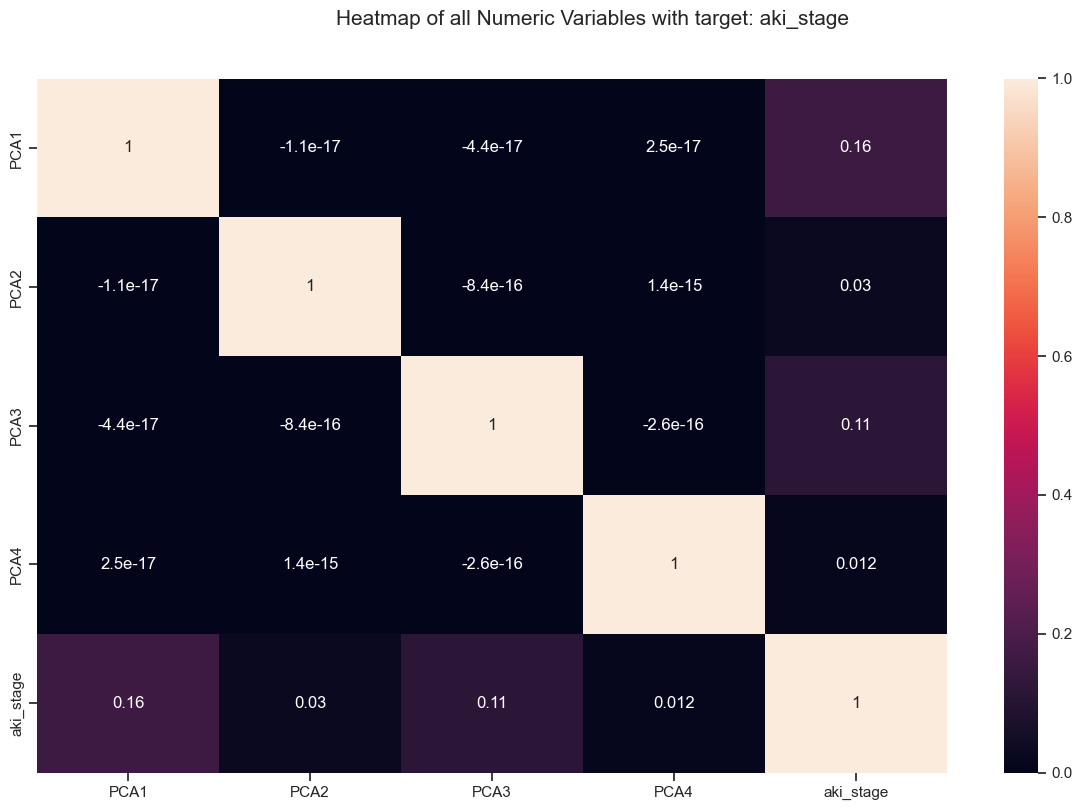

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [44]:
pca_df = pca_df.reset_index(drop=True)
df_y = pd.Series(y_test, name="aki_stage").reset_index(drop=True)
df_av = pd.concat([pca_df, df_y], axis=1)

from autoviz import AutoViz_Class
AV = AutoViz_Class()
dft = AV.AutoViz(df_av, depVar="aki_stage", save_plot_dir=r"d:\Users\.virtualenvs\.virtualenvs\new_env\ai311\UHD\DM")

## SweetViz

1. SweetViz_Report
2. SweetViz_Compare

In [35]:
import sweetviz as sv
analyze_report = sv.analyze(pca_df)

                                             |          | [  0%]   00:00 -> (? left)

In [36]:
# show the report in a form of an HTML file
analyze_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from sweetviz.feature_config import FeatureConfig
fc = FeatureConfig(force_num=["aki_stage"])

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(pca_labeled, train_size=0.75, random_state=2021, stratify=pca_labeled["aki_stage"])

import sweetviz as sv
compare = sv.compare(source=train_df, compare=test_df, target_feat="aki_stage", feat_cfg=fc)
compare.show_html('Compare.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Original Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.patheffects as PathEffects
import pickle

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.tree import _tree, DecisionTreeClassifier
from IPython.display import display, HTML
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Generation   
This table includes the important features for AKI stages prediction and the corresponding AKI stages labels. 

In [3]:
# Load the dataset
df = pd.read_csv("Raw_aki_patient_data.csv")
# And get a peek of the first five lines of it
df.head()

,creat,uo_rt_6hr,uo_rt_12hr,uo_rt_24hr,aki_stage,ANIONGAP_min,ANIONGAP_max,ALBUMIN_min,ALBUMIN_max,BANDS_min,...,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min_1,Glucose_Max_1,Glucose_Mean
0,NaN,1.8030,1.2149,1.2727,0,11.0,14.0,NaN,NaN,NaN,...,19.578475,36.722221,39.444444,37.829806,12.0,100.0,98.679558,97.0,123.0,108.500000
1,NaN,0.1437,0.1646,0.1782,3,15.0,20.0,1.9,2.6,8.0,...,23.348624,35.722222,38.833333,37.454106,70.0,100.0,93.792683,94.0,243.0,142.714286
2,NaN,1.0916,0.8270,0.7497,0,19.0,27.0,3.0,3.5,NaN,...,34.680000,37.444445,38.333333,37.896825,18.0,100.0,90.266667,42.0,270.0,133.769231
3,0.9,NaN,NaN,NaN,1,10.0,24.0,3.2,3.9,NaN,...,21.883721,36.111111,39.055557,37.166667,56.0,100.0,96.131579,74.0,208.0,128.380000
4,NaN,15.6182,15.6182,15.6182,0,NaN,NaN,NaN,NaN,NaN,...,14.750000,35.722222,35.722222,35.722222,43.0,100.0,94.300000,NaN,NaN,NaN


In [3]:
df.shape

(56093, 67)

In [4]:
# Get a peek of the features
print(list(df.columns))

['creat', 'uo_rt_6hr', 'uo_rt_12hr', 'uo_rt_24hr', 'aki_stage', 'ANIONGAP_min', 'ANIONGAP_max', 'ALBUMIN_min', 'ALBUMIN_max', 'BANDS_min', 'BANDS_max', 'BICARBONATE_min', 'BICARBONATE_max', 'BILIRUBIN_min', 'BILIRUBIN_max', 'CREATININE_min', 'CREATININE_max', 'CHLORIDE_min', 'CHLORIDE_max', 'GLUCOSE_min', 'GLUCOSE_max', 'HEMATOCRIT_min', 'HEMATOCRIT_max', 'HEMOGLOBIN_min', 'HEMOGLOBIN_max', 'LACTATE_min', 'LACTATE_max', 'PLATELET_min', 'PLATELET_max', 'POTASSIUM_min', 'POTASSIUM_max', 'PTT_min', 'PTT_max', 'INR_min', 'INR_max', 'PT_min', 'PT_max', 'SODIUM_min', 'SODIUM_max', 'BUN_min', 'BUN_max', 'WBC_min', 'WBC_max', 'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min_1', 'Glucose_Max_1', 'Glucose_Mean']


## Data Preprocessing

In [5]:
# Take look at percenatge of missing values per feature(column)
per_missing = df.isnull().sum()*100/len(df)
per_missing_df = pd.DataFrame(
    {"Feature Name": df.columns,
     "Missing Percentage": per_missing}
)
# Sort the percentage in a descending order
per_missing_df.sort_values(ascending=False, by="Missing Percentage", inplace=True)
per_missing_df

,Feature Name,Missing Percentage
BANDS_min,BANDS_min,81.926444
BANDS_max,BANDS_max,81.926444
uo_rt_12hr,uo_rt_12hr,68.288378
uo_rt_24hr,uo_rt_24hr,68.288378
uo_rt_6hr,uo_rt_6hr,68.288378
...,...,...
HEMATOCRIT_min,HEMATOCRIT_min,0.825415
HeartRate_Max,HeartRate_Max,0.224627
HeartRate_Min,HeartRate_Min,0.224627
HeartRate_Mean,HeartRate_Mean,0.224627


In [6]:
per_missing_df["Missing Percentage"].values

array([81.92644358, 81.92644358, 68.28837823, 68.28837823, 68.28837823,
       51.95122386, 51.95122386, 41.70395593, 41.70395593, 39.77501649,
       39.77501649, 32.9720286 , 12.63080955, 12.63080955, 12.33487244,
       12.33487244, 12.32952418, 12.32952418,  6.91886688,  6.91886688,
        6.91886688,  6.71028471,  6.71028471,  6.71028471,  6.68532615,
        6.68532615,  6.68532615,  6.65501934,  6.65501934,  6.65501934,
        6.65323659,  6.65323659,  6.65323659,  6.64254007,  6.64254007,
        6.64254007,  6.46604746,  6.46604746,  6.46604746,  6.18793789,
        6.18793789,  5.69411513,  5.69411513,  5.69411513,  5.69411513,
        2.41384843,  2.41384843,  2.37106234,  2.37106234,  2.11434582,
        2.11434582,  2.08225625,  2.08225625,  2.03590466,  2.03590466,
        1.04112813,  1.04112813,  1.03221436,  1.03221436,  1.00012479,
        1.00012479,  0.82541494,  0.82541494,  0.22462696,  0.22462696,
        0.22462696,  0.        ])

In [7]:
per_missing_df.at["BANDS_min", "Missing Percentage"]

81.92644358476102

In [8]:
dftype = pd.DataFrame(df.dtypes, columns=['pd_type'])
dftype['n_unique'] = df.nunique()
dftype['nan_bool'] = df.isna().any()
dftype['n_nan'] = df.isna().sum()
dftype

,pd_type,n_unique,nan_bool,n_nan
creat,float64,153,True,18495
uo_rt_6hr,float64,11397,True,38305
uo_rt_12hr,float64,11884,True,38305
uo_rt_24hr,float64,12390,True,38305
aki_stage,int64,4,False,0
...,...,...,...,...
SpO2_Max,float64,36,True,3764
SpO2_Mean,float64,29910,True,3764
Glucose_Min_1,float64,376,True,3627
Glucose_Max_1,float64,857,True,3627


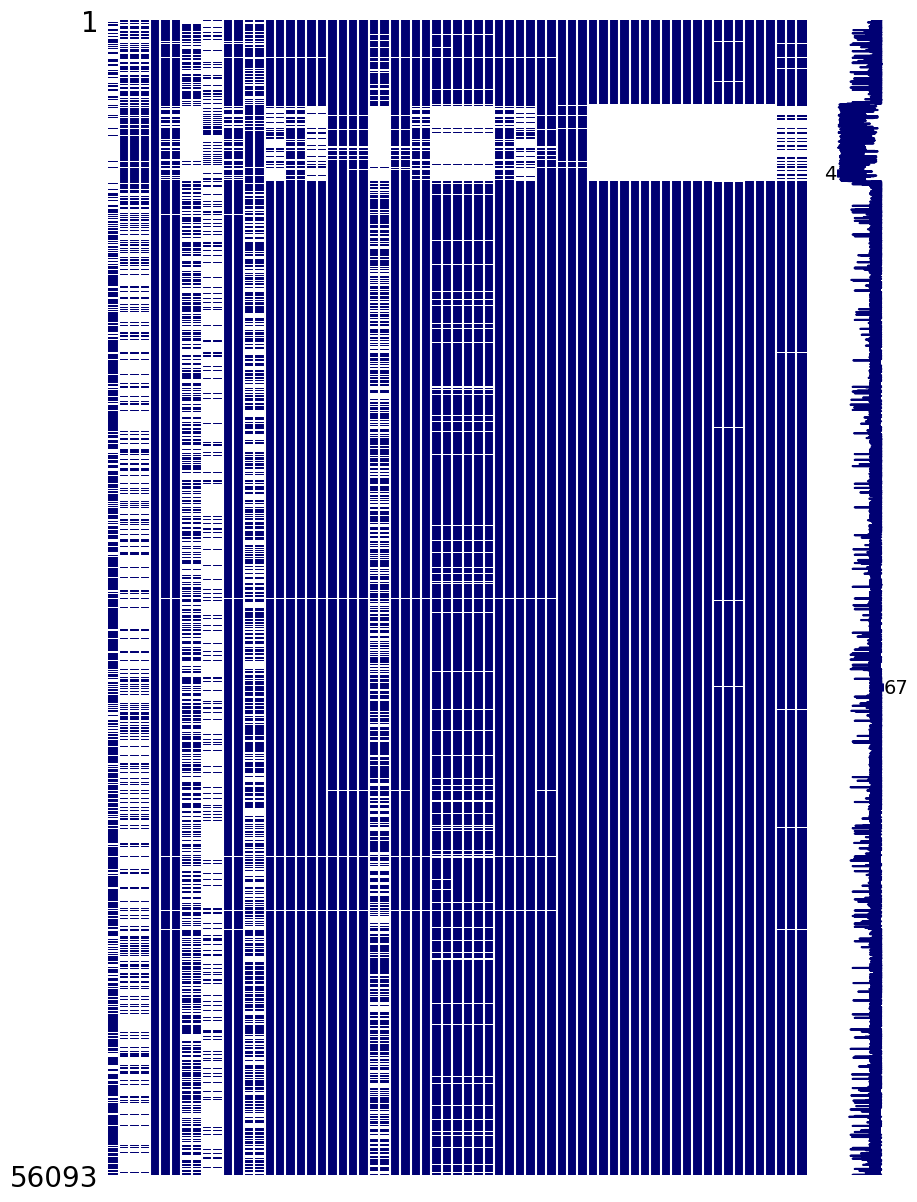

In [9]:
# Visualize missing values as a matrix
import missingno as msno
#X_all = df.drop(columns=['aki_stage'])
msno.matrix(df, color=(0., 0., 0.45))   
fig = plt.gcf()
fig.set_size_inches(10, 15)

In [10]:
# Drop the feature if the missing percenatge is greater than 40 percent
for feature in per_missing_df["Feature Name"].values:
  if per_missing_df.at[feature, "Missing Percentage"] >= 40:
    df.drop([feature], inplace=True, axis=1)
print(df.columns)

Index(['creat', 'aki_stage', 'ANIONGAP_min', 'ANIONGAP_max', 'BICARBONATE_min',
       'BICARBONATE_max', 'CREATININE_min', 'CREATININE_max', 'CHLORIDE_min',
       'CHLORIDE_max', 'GLUCOSE_min', 'GLUCOSE_max', 'HEMATOCRIT_min',
       'HEMATOCRIT_max', 'HEMOGLOBIN_min', 'HEMOGLOBIN_max', 'LACTATE_min',
       'LACTATE_max', 'PLATELET_min', 'PLATELET_max', 'POTASSIUM_min',
       'POTASSIUM_max', 'PTT_min', 'PTT_max', 'INR_min', 'INR_max', 'PT_min',
       'PT_max', 'SODIUM_min', 'SODIUM_max', 'BUN_min', 'BUN_max', 'WBC_min',
       'WBC_max', 'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean',
       'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max',
       'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
       'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean',
       'Glucose_Min_1', 'Glucose_Max_1', 'Glucose_Mean'],
      dtype='object')


In [11]:
df.head()

,creat,aki_stage,ANIONGAP_min,ANIONGAP_max,BICARBONATE_min,BICARBONATE_max,CREATININE_min,CREATININE_max,CHLORIDE_min,CHLORIDE_max,...,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min_1,Glucose_Max_1,Glucose_Mean
0,NaN,0,11.0,14.0,30.0,32.0,0.6,0.8,99.0,106.0,...,19.578475,36.722221,39.444444,37.829806,12.0,100.0,98.679558,97.0,123.0,108.500000
1,NaN,3,15.0,20.0,12.0,21.0,1.0,1.6,97.0,105.0,...,23.348624,35.722222,38.833333,37.454106,70.0,100.0,93.792683,94.0,243.0,142.714286
2,NaN,0,19.0,27.0,11.0,19.0,1.3,2.0,107.0,111.0,...,34.680000,37.444445,38.333333,37.896825,18.0,100.0,90.266667,42.0,270.0,133.769231
3,0.9,1,10.0,24.0,18.0,30.0,0.6,1.6,96.0,108.0,...,21.883721,36.111111,39.055557,37.166667,56.0,100.0,96.131579,74.0,208.0,128.380000
4,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,113.0,113.0,...,14.750000,35.722222,35.722222,35.722222,43.0,100.0,94.300000,NaN,NaN,NaN


### Interpolation of missing data

Since we don't have any prior knowledge about the distribution of these data, one way for interpolation is to fill all the NAs with mean value of that column.

In [12]:
for feature in df.columns:
  # Calculate the mean values of each column ignoring nas
  mean_value = df[feature].mean(skipna=True)
  # Interpolate the missing value with the mean value
  df[feature].fillna(value=mean_value, inplace=True)

# Peek the dataset
df.head()

,creat,aki_stage,ANIONGAP_min,ANIONGAP_max,BICARBONATE_min,BICARBONATE_max,CREATININE_min,CREATININE_max,CHLORIDE_min,CHLORIDE_max,...,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min_1,Glucose_Max_1,Glucose_Mean
0,1.342936,0,11.000000,14.000000,30.000000,32.00000,0.6,0.8,99.0,106.0,...,19.578475,36.722221,39.444444,37.829806,12.0,100.0,98.679558,97.000000,123.000000,108.500000
1,1.342936,3,15.000000,20.000000,12.000000,21.00000,1.0,1.6,97.0,105.0,...,23.348624,35.722222,38.833333,37.454106,70.0,100.0,93.792683,94.000000,243.000000,142.714286
2,1.342936,0,19.000000,27.000000,11.000000,19.00000,1.3,2.0,107.0,111.0,...,34.680000,37.444445,38.333333,37.896825,18.0,100.0,90.266667,42.000000,270.000000,133.769231
3,0.900000,1,10.000000,24.000000,18.000000,30.00000,0.6,1.6,96.0,108.0,...,21.883721,36.111111,39.055557,37.166667,56.0,100.0,96.131579,74.000000,208.000000,128.380000
4,1.342936,0,11.226164,16.918395,21.665044,28.04884,1.0,1.0,113.0,113.0,...,14.750000,35.722222,35.722222,35.722222,43.0,100.0,94.300000,95.057013,239.531548,137.017814


In [13]:
#As we can see that the all the NAs have gone
df.isnull().values.any()

False

In [14]:
# Let's take a look at the summary of this dataset
df.describe()

,creat,aki_stage,ANIONGAP_min,ANIONGAP_max,BICARBONATE_min,BICARBONATE_max,CREATININE_min,CREATININE_max,CHLORIDE_min,CHLORIDE_max,...,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min_1,Glucose_Max_1,Glucose_Mean
count,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,...,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000,56093.000000
mean,1.342936,0.310342,11.226164,16.918395,21.665044,28.048840,1.095230,1.753217,99.981574,108.503743,...,19.083222,35.852295,37.717340,36.830278,87.983899,99.704848,96.879729,95.057013,239.531548,137.017814
std,1.217599,0.781658,3.105499,4.602545,4.665786,4.568863,1.056676,1.952617,5.693187,5.840850,...,3.539276,0.769855,0.809219,0.540202,11.542212,1.077874,2.346509,31.113892,5970.922590,154.523360
min,0.000000,0.000000,1.000000,4.000000,2.000000,5.000000,0.050000,0.100000,1.600000,74.000000,...,7.333333,15.000000,30.000000,30.000000,0.500000,42.000000,31.444444,0.106000,1.000000,1.000000
25%,0.800000,0.000000,9.000000,14.000000,19.000000,25.000000,0.600000,0.900000,97.000000,105.000000,...,16.644444,35.555556,37.166668,36.518056,87.983899,100.000000,96.129032,78.000000,141.000000,113.757143
50%,1.200000,0.000000,11.000000,16.000000,22.000000,28.000000,0.800000,1.200000,100.000000,108.000000,...,18.935484,35.852295,37.700000,36.830278,91.000000,100.000000,97.041667,94.000000,183.000000,130.714286
75%,1.342936,0.000000,13.000000,19.000000,24.000000,30.000000,1.100000,1.753217,103.000000,112.000000,...,20.943820,36.277779,38.166665,37.133333,94.000000,100.000000,98.153846,107.000000,239.531548,148.500000
max,20.100000,3.000000,45.000000,77.000000,52.000000,60.000000,19.100000,138.000000,134.000000,198.000000,...,43.777778,40.833333,46.500000,40.833333,100.000000,100.000000,100.000000,798.000000,999999.000000,32392.483871


### Rebalancing the class distribution

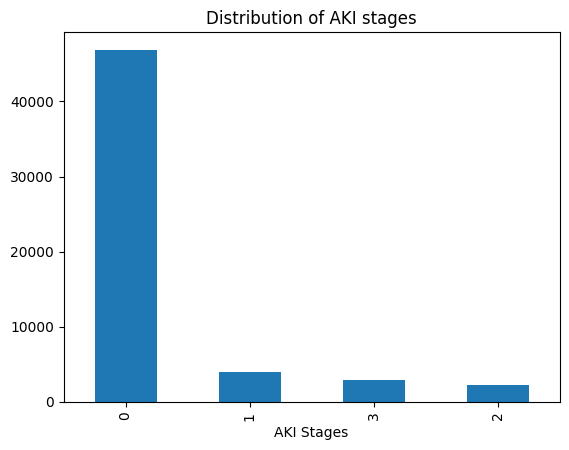

In [15]:
df["aki_stage"].value_counts().plot.bar()
plt.title("Distribution of AKI stages")
plt.xlabel("AKI Stages")
plt.show()

In [16]:
# We can observe that our dataset is extremly umbalanaced with too many class 0
# This may cause overfitting, so we want to some of class 0
df["aki_stage"].value_counts()

aki_stage
0    46867
1     3995
3     2951
2     2280
Name: count, dtype: int64

In [17]:
# Only keep 10 percent of the original class 0
df = df.drop(df[df['aki_stage'] == 0].sample(frac=.9).index)
print(df["aki_stage"].value_counts())

aki_stage
0    4687
1    3995
3    2951
2    2280
Name: count, dtype: int64


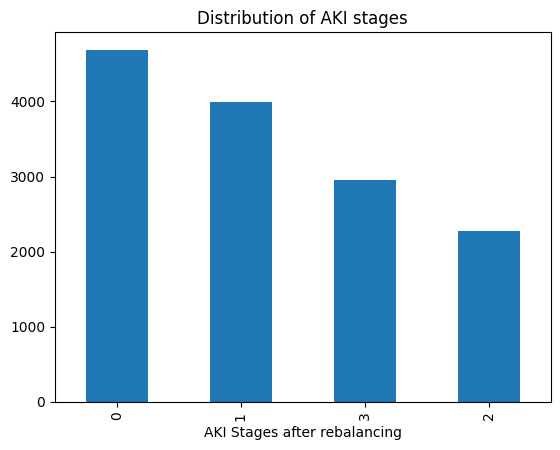

In [18]:
df["aki_stage"].value_counts().plot.bar()
plt.title("Distribution of AKI stages")
plt.xlabel("AKI Stages after rebalancing")
plt.show()
# We can see that the class distribution is much balance now

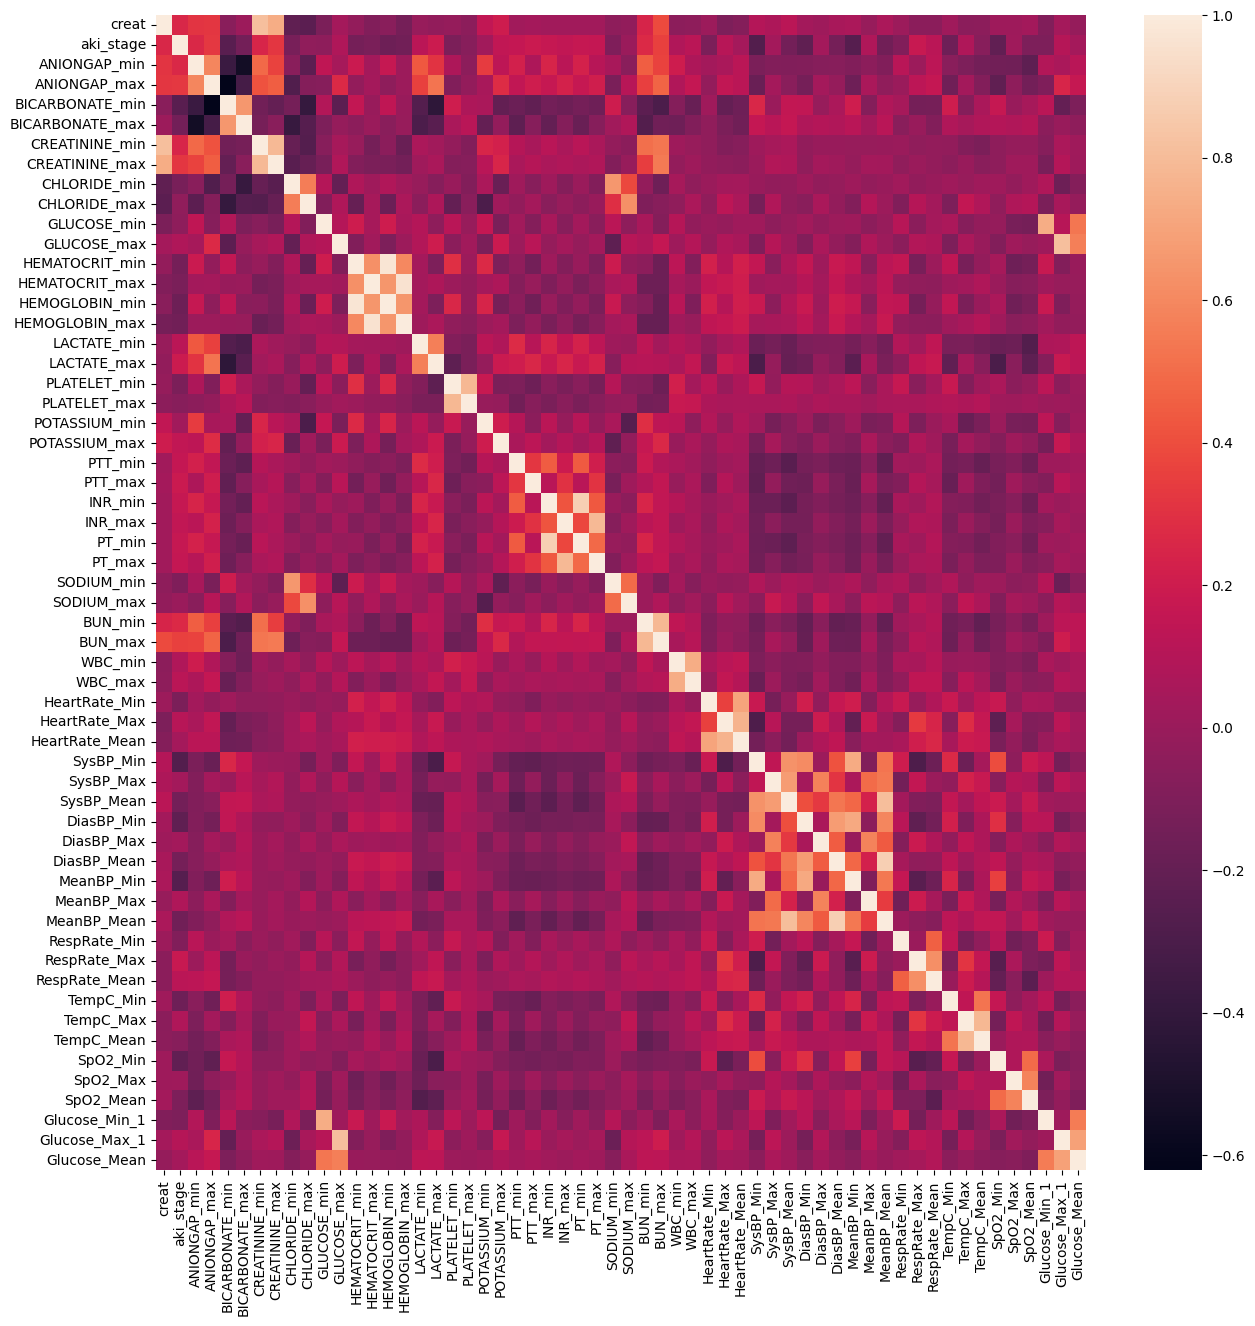

In [19]:
# Let's take a look at the correlation matrix
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr())
plt.show()

### Train Test Split

For this part, we want to split our dataset into train and test dataset.

In [20]:
# First split into features and labels
df_y = df["aki_stage"]
df_X = df.drop(["aki_stage"], axis=1)
# Turn the dataframes into numpy arrays for further calulation
y = df_y.to_numpy()
X= df_X.to_numpy()

In [21]:
print(X.shape, "\n", y.shape)

(13913, 57) 
 (13913,)


In [22]:
# Train test split
# 30% would be a good percenatge for testing our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2021)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9739, 57) (4174, 57) (9739,) (4174,)


### Standarization

The range of different feature values varies a lot. We need to standardize them after the train test plit incase of leakage of information.

In [23]:
# Train Data Scaler
train_scaler = preprocessing.StandardScaler().fit(X_train)
# mean, scale
print("means:", "\n", train_scaler.mean_)
print("scales:", "\n", train_scaler.scale_)

means: 
 [  1.86138654  11.7946458   18.12787259  20.82237668  27.83604356
   1.42208032   2.48715312  99.20397878 108.38463885  90.82500633
 208.33356609  27.63686932  36.51547487   9.28657256  12.11740751
   1.67695832   3.50358471 173.55670124 276.54037045   3.54360266
   5.10438853  30.14570227  56.75118321   1.27418159   2.04784717
  14.1693878   19.60208678 134.52674665 142.05075358  22.65196126
  41.94993421   8.63955764  16.03118695  66.92384237 115.55501183
  87.96299911  82.55261603 159.10144753 118.6283368   37.54310334
  92.6658476   59.73089601  50.73962219 117.86717908  77.26211306
  10.67567492  31.16377576  19.44063938  35.72861551  37.75022862
  36.79174384  85.68660856  99.72984824  96.65680822  91.99039805
 213.90047876 137.9382144 ]
scales: 
 [  1.87813426   3.60650689   5.37270031   5.16004819   5.00153536
   1.42552907   2.61841529   6.0246348    6.4483533   31.92948367
 119.06779752   6.78229811   5.73083834   2.29881393   1.9909127
   1.22665326   3.01199467 103

In [24]:
# Fit
X_train = train_scaler.transform(X_train)

In [25]:
print(X_train.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
# Train Data Scaler
test_scaler = preprocessing.StandardScaler().fit(X_test)
# Fit
X_test = test_scaler.transform(X_test)

Now we are ready to train our models with our preprocessed dataset

## Unsupervised Clustering

Let's first try to visualize our high dimensional data, here I have tried two different method PCA and tSNE

In [28]:
time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_test)

print("PCA done! Time elapsed {} seconds".format(time.time() - time_start))

PCA done! Time elapsed 0.2289268970489502 seconds


In [29]:
# Check the PCA components
pca_df = pd.DataFrame(columns=["PCA1", "PCA2", "PCA3", "PCA4"])

for i in range(4):
  pca_df["PCA{}".format(i+1)] = pca_result[:, i]

print("Variance explained per principle component: {}".format(pca.explained_variance_ratio_))
print(pca_df)

Variance explained per principle component: [0.12470934 0.07589155 0.07459159 0.07074783]
          PCA1      PCA2      PCA3      PCA4
0     0.707608 -2.416452 -1.312956  1.988625
1    -0.426618 -1.496450 -2.666138 -0.942998
2     7.021599  1.407728  3.636708 -3.841477
3     4.443383 -3.290506  1.521715 -2.073122
4    -0.495148 -1.086573 -0.629926 -0.863325
...        ...       ...       ...       ...
4169  6.281344  2.878408 -0.118385  0.842794
4170  3.803612  5.961521  4.374491  4.551493
4171 -2.592696 -2.471652  0.559154 -1.320311
4172  8.373937  1.415104  0.607665  2.435004
4173  2.024808 -0.380564  2.387115 -3.623094

[4174 rows x 4 columns]


In [30]:
# Utility function to visualize the outputs of PCA and t-SNE

def grouping_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts 

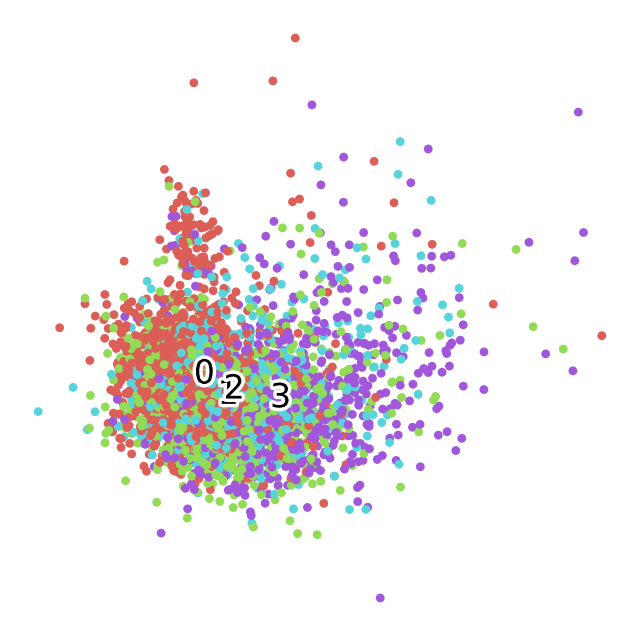

In [31]:
# Visualize the first two components
top_two_comp = pca_df[["PCA1", "PCA2"]]

grouping_scatter(top_two_comp.values, y_test)
plt.show()

We can see that the first two PCA components cannot explain the variance, and we cannot tell the difference of the groups. Let's try tSNE now.

In [32]:
# Before the tSNE first use the PCA
time_start = time.time()

pca_20 = PCA(n_components=20)
pca_result_20 = pca_20.fit_transform(X_test)

print("PCA with 20 components done! Time elapsed: {} seconds".format(time.time() - time_start))
print("cuculative variance exlained by 20 principle components: {}".format(np.sum(pca_20.explained_variance_ratio_)))

PCA with 20 components done! Time elapsed: 0.0397944450378418 seconds
cuculative variance exlained by 20 principle components: 0.8107904277293546


In [33]:
time_start = time.time()

pca_20_tsne = TSNE(random_state=2021).fit_transform(pca_result_20)
print("t-SNE done! Time elapsed: {} seconds".format(time.time()-time_start))

t-SNE done! Time elapsed: 12.60241436958313 seconds


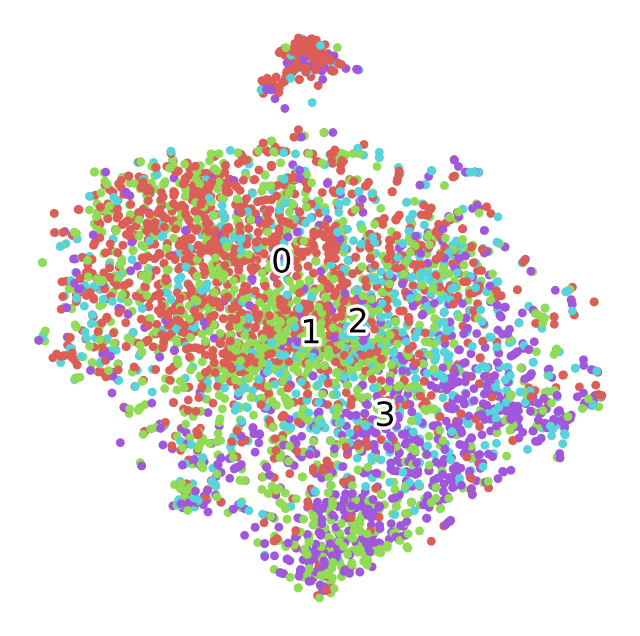

In [34]:
# Visualize the tSNE
grouping_scatter(pca_20_tsne, y_test)
plt.show()

From the tSNE we can see that the stage 0 and stage 3 are clearly seperated while stage 2 and stage 1 are mixed together.  
We can anticipate that our clustering results may not be good.